# Group assignment

## Energy data analysis

In this assignment, you will work with the `energy.csv` dataset, containing **hourly** data of energy consumption and generation in Spain. This dataset also contains the spot price of electricity.

### Rules for the assignment:

* Deadline: December 6th, 2022, 11pm.
* The group assignment's grade will be graded on the following criteria:
    * 50 %: presentation during Sessions 19 or 20
    * 50 %: answering questions during presentations
* Submission: 1 zip file containing:
    * 1 Jupyter notebook with your code: `group_assignment_group_X.ipynb`
    * 1 PDF file with your presentation
    * Not following these rules will result in a 0 grade for the assignment.
* No freeloaders during Group Assignments: if any of you see that any of your group members is not collaborating you tell me immediately. I will not accept excuses at the end of the course about the performance of any member.
* The presentation will be done by ONE (1) person chosen by the professor at random in the day of the presentations, so you all better work and collaborate to do a good job!
* All the students must be present during the presentations of the rest of the groups. 

### Type here the names of the members of your group

1. Adam Jamison
2. Sergio Reyes
3. Roberta Troccoli
4. Andrea Palomino
5. Walid Tarrab
6. Mariano Rodas
7. Pedro Valencia

### 0. Read the data

Read the data from the `energy.csv` file and store it in a DataFrame called `energy`.

In [1]:
# Change directory to where you have stored the file energy.csv

import os
os.chdir("/Users/sergi/python_class/term 1/files")
os.getcwd()

'C:\\Users\\sergi\\python_class\\term 1\\files'

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np

energy = pd.read_csv("energy.csv")

energy.head()

,datetime,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price,year,month,day,hour,weekday
0,2018-12-31 23:00:00+00:00,23251.2,6059.2,2954.0,7.1,3202.8,1867.0,3830.3,66.88,2018,12,31,23,0
1,2019-01-01 00:00:00+00:00,22485.0,6059.2,3044.1,8.0,2884.4,1618.0,3172.1,66.88,2019,1,1,0,1
2,2019-01-01 01:00:00+00:00,20977.0,6059.2,3138.6,7.5,1950.8,1535.3,2980.5,66.00,2019,1,1,1,1
3,2019-01-01 02:00:00+00:00,19754.2,6059.2,3596.2,7.5,1675.7,1344.0,2840.0,63.64,2019,1,1,2,1
4,2019-01-01 03:00:00+00:00,19320.6,6063.4,3192.6,7.5,1581.8,1345.0,3253.4,58.85,2019,1,1,3,1


### 1. Convert the `weekday` column from a number to a string (1 point)

Knowing that 0 represents Monday, 1 represents Tuesday, etc., convert the `weekday` column from a number to a string. 

Use `map` to perform this operation. You can mix it with a `lambda` function.

In [3]:
dict_weekday_names = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}

energy["weekday"] = energy["weekday"].map(lambda day: dict_weekday_names[day])

energy.head()

,datetime,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price,year,month,day,hour,weekday
0,2018-12-31 23:00:00+00:00,23251.2,6059.2,2954.0,7.1,3202.8,1867.0,3830.3,66.88,2018,12,31,23,Monday
1,2019-01-01 00:00:00+00:00,22485.0,6059.2,3044.1,8.0,2884.4,1618.0,3172.1,66.88,2019,1,1,0,Tuesday
2,2019-01-01 01:00:00+00:00,20977.0,6059.2,3138.6,7.5,1950.8,1535.3,2980.5,66.00,2019,1,1,1,Tuesday
3,2019-01-01 02:00:00+00:00,19754.2,6059.2,3596.2,7.5,1675.7,1344.0,2840.0,63.64,2019,1,1,2,Tuesday
4,2019-01-01 03:00:00+00:00,19320.6,6063.4,3192.6,7.5,1581.8,1345.0,3253.4,58.85,2019,1,1,3,Tuesday


### 2. Same but for months (1 point)

In [4]:
dict_month_names = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}

energy["month"] = energy["month"].map(lambda month: dict_month_names[month])

energy.head()

,datetime,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price,year,month,day,hour,weekday
0,2018-12-31 23:00:00+00:00,23251.2,6059.2,2954.0,7.1,3202.8,1867.0,3830.3,66.88,2018,December,31,23,Monday
1,2019-01-01 00:00:00+00:00,22485.0,6059.2,3044.1,8.0,2884.4,1618.0,3172.1,66.88,2019,January,1,0,Tuesday
2,2019-01-01 01:00:00+00:00,20977.0,6059.2,3138.6,7.5,1950.8,1535.3,2980.5,66.00,2019,January,1,1,Tuesday
3,2019-01-01 02:00:00+00:00,19754.2,6059.2,3596.2,7.5,1675.7,1344.0,2840.0,63.64,2019,January,1,2,Tuesday
4,2019-01-01 03:00:00+00:00,19320.6,6063.4,3192.6,7.5,1581.8,1345.0,3253.4,58.85,2019,January,1,3,Tuesday


### 3. What's the percentage of *unique* days in the total period in which we had at least one hour with a price below 10 euros? (1 point)

I'm not asking for the percentage of days of the month (represented in the column `day`), but the percentage of *unique* dates in the total period.

Maybe it's interesting to build a new column with the date, not the datetime. You can do this with the `pd.to_datetime` function. Or you can concat columns:

In the end you'll need a column representing the date, not the datetime, not the year, month, day, etc.

In [5]:
energy["datetime"] = pd.to_datetime(energy["datetime"])

energy["date"] = energy["datetime"].dt.date

price_less_than_10=energy.loc[energy["spot_price"]<10]

unique_dates = price_less_than_10["date"].unique()
dates = len(energy.groupby(["date"])["spot_price"])

percentage_unique_dates=len(unique_dates)/dates*100
print(f"The percentage is {round(percentage_unique_dates,2)}%.")

The percentage is 4.38%.


### 4. How many hours per month, in average, do we have a price above the monthly average? And below? (1 point)

In [6]:
energy["month_year"] = energy["month"].astype(str)+"-"+energy["year"].astype(str)
month_averageQ4 = energy.groupby(["month_year"])["spot_price"].mean()

dict_month_average = month_averageQ4.to_dict()
#dict_month_average

In [7]:
energy["mean_month"] = energy["month_year"].map(lambda m: dict_month_average[m])

energy["price_comp"] = np.where(energy["spot_price"] > energy["mean_month"],
                                True,
                                False
                               )
#energy.head()

In [8]:
average_calculations = energy.groupby(["month_year"])[["price_comp"]].mean()

average_calculations["below_average"] = np.where(average_calculations["price_comp"] > 0.5,"Price is above AVG",
    (np.where(average_calculations["price_comp"] == 0, "Price is equal to average", "Price is below AVG")))

average_calculations

,price_comp,below_average
month_year,,
April-2019,0.651389,Price is above AVG
August-2019,0.538978,Price is above AVG
December-2018,0.000000,Price is equal to average
December-2019,0.576389,Price is above AVG
February-2019,0.571429,Price is above AVG
January-2019,0.623656,Price is above AVG
July-2019,0.564516,Price is above AVG
June-2019,0.509722,Price is above AVG
March-2019,0.658602,Price is above AVG


### 5. Several questions (1 point)

Qualitative questions:

* Is `gas` generation higher or lower than its hourly average when `wind` generation is above its hourly average?
* Is the `spot_price` higher or lower than its hourly average when `solar` generation is above hourly its average?
* Is the `spot_price` higher or lower than its monthly average when `power_demand` is above its monthly average?


In [9]:
# Is gas generation higher or lower than its hourly average when wind generation is above its hourly average?

gas_average = energy["gas"].mean()
wind_average = energy["wind"].mean()


energy["gas_average"] = np.where(energy["gas"] > gas_average,
                                True,
                                False
                               )

energy["wind_average"] = np.where(energy["wind"] > wind_average,
                                True,
                                False
                               )

gas_higher_when_energy_high = energy[
    (energy["wind_average"]==True)
]["gas_average"].mean()

gas_higher_when_energy_high

print(f"Gas production is higher in {gas_higher_when_energy_high * 100}% when wind production is above its average.")

Gas production is higher in 24.0% when wind production is above its average.


In [10]:
# Is the spot_price higher or lower than its hourly average when solar generation is above hourly its average?

price_average = energy["spot_price"].mean()
solar_average = energy["solar"].mean()

energy["solar_average"] = np.where(energy["solar"] > solar_average,
                                   True,
                                   False,
                                  )

spot_high_solar_average = energy[
    (energy["solar_average"] == True)
]["spot_price"].mean()

answer = ["is" if spot_high_solar_average > price_average  else "is not"]

print(f"Spot price {answer} higher is than its hourly average when solar generation is above average.")

Spot price ['is'] higher is than its hourly average when solar generation is above average.


In [11]:
# Is the spot_price higher or lower than its monthly average when power_demand is above its monthly average?

power_demand_average = energy["power_demand"].mean()

energy["power_average"] = np.where(energy["power_demand"] > power_demand_average,
                                   True,
                                   False,
                                  )

spot_high_power_average = energy[
    (energy["power_demand"] == True)
]["spot_price"].mean()

answer = ["is" if spot_high_solar_average > price_average  else "is not"]

print(f"Spot price {answer} higher than its monthly average when power demand generation is above average.")

Spot price ['is'] higher than its monthly average when power demand generation is above average.


In [12]:
# Is the spot_price higher or lower than its monthly average when power_demand is above its monthly average?

groupby_Q5_1 = energy.groupby(["month_year"])[["spot_price"]].mean()
months=energy["month_year"].unique()

monthly_avg_power_demand=[]
monthly_avg_spot_price=[]

# avg power by month
for month in months:
    monthy_power=energy.loc[energy["month_year"]==month]
    monthly_avg_power_demand.append(monthy_power["power_demand"].sum()/len(monthy_power))
#print(monthly_avg_power_demand)
    
# avg price by month   
for month in months:
    monthy_spotPrice=energy.loc[energy["month_year"]==month]
    monthly_avg_spot_price.append(monthy_spotPrice["spot_price"].sum()/len(monthy_spotPrice))
#print(monthly_avg_spot_price)

# total avg per month for power
monthly_avg_power_demand_total = sum(monthly_avg_power_demand) / len(months)
print(monthly_avg_power_demand_total)

# total avg per month for price
monthly_avg_spotPrice_total = sum(monthly_avg_spot_price) / len(months)
print(monthly_avg_spotPrice_total)

28112.511429506874
49.168884824628776


In [13]:
df_powerQ5 = pd.DataFrame(monthly_avg_power_demand)

df_powerQ5["averageQ5_power"] = np.where(
    df_powerQ5[0] > monthly_avg_power_demand_total,
    df_powerQ5[0] / monthly_avg_power_demand_total,
    df_powerQ5[0] / monthly_avg_power_demand_total
)

df_spotPriceQ5 = pd.DataFrame(monthly_avg_spot_price)

df_spotPriceQ5["averageQ5_spotPrice"] = np.where(
    df_spotPriceQ5[0] > monthly_avg_spotPrice_total,
    df_spotPriceQ5[0] / monthly_avg_spotPrice_total,
    df_spotPriceQ5[0] / monthly_avg_spotPrice_total
)

df_finalQ5 = df_powerQ5.join(df_spotPriceQ5, lsuffix='_powerGen', rsuffix='_spotPrice')

df_finalQ5["month_date"] = months

df_finalQ5 = df_finalQ5.set_index(["month_date"])

df_finalQ5 = df_finalQ5.query("averageQ5_power > 1")

df_finalQ5["result"] = np.where(
    df_finalQ5["averageQ5_spotPrice"] > 1,
    "Price is higher than its monthly AVG",
    "Price is lower than its monthly AVG")

df_finalQ5

,0_powerGen,averageQ5_power,0_spotPrice,averageQ5_spotPrice,result
month_date,,,,,
January-2019,31420.319758,1.117663,61.959852,1.260144,Price is higher than its monthly AVG
February-2019,30040.113095,1.068567,54.020491,1.098672,Price is higher than its monthly AVG
July-2019,30624.640188,1.089360,51.464301,1.046684,Price is higher than its monthly AVG
August-2019,28710.512231,1.021272,44.951815,0.914233,Price is lower than its monthly AVG
November-2019,28887.152639,1.027555,42.187181,0.858006,Price is lower than its monthly AVG


### 6. Understanding types of power generation (1 point)

The different types of power generation are:
* `nuclear`: nuclear power plants
* `hydro`: hydroelectric power plants
* `wind`: wind power plants
* `solar`: solar power plants
* `gas`: gas power plants
* `coal`: coal power plants

6.1. What's the average contribution of each type of power generation in percentage to the total generation, in the whole period?

6.2. What was the average contribution of each type power generation in percentage in the most expensive month?

6.3. What was the average contribution of each type power generation in percentage in the cheapest month?

In [14]:
# Run the cell each time you want to check a result
#6.1. What's the average contribution of each type of power generation in percentage to the total generation, in the whole period?

total_nuclear = energy["nuclear"].sum()
total_solar = energy["solar"].sum()
total_gas = energy["gas"].sum()
total_hydro = energy["hydro"].sum()
total_wind = energy["wind"].sum()
total_coal = energy["coal"].sum()

total_energy = total_coal + total_gas + total_hydro + total_nuclear + total_solar+ total_wind 

nuclearQ6_1 = round(total_nuclear/total_energy * 100, 2)
solarQ6_1 = round(total_solar/total_energy * 100, 2)
gasQ6_1 = round(total_gas/total_energy * 100, 2)
hydroQ6_1 = round(total_hydro/total_energy * 100, 2)
windQ6_1 = round(total_wind/total_energy * 100, 2)
coalQ6_1 = round(total_coal/total_energy * 100, 2)

queryQ6_1 = str(input("Type your desired query in lower case\n"))

if queryQ6_1 == "solar":
    print(f"The contribution of solar energy is {solarQ6_1} %")
elif queryQ6_1 == "gas":
    print(f"The contribution of solar energy is {gasQ6_1} %")
elif queryQ6_1 == "hydro":
    print(f"The contribution of solar energy is {hydroQ6_1} %")
elif queryQ6_1 == "wind":
    print(f"The contribution of solar energy is {windQ6_1} %")
elif queryQ6_1 == "coal":
    print(f"The contribution of solar energy is {coalQ6_1} %")
elif queryQ6_1 == "nuclear":
    print(f"The contribution of solar energy is {nuclearQ6_1} %")
else:
    print("Use one of the keywords: 'solar', 'nuclear', 'gas', 'hydro', 'wind', 'coal'")

Type your desired query in lower case
 solar


The contribution of solar energy is 4.34 %


In [15]:
# Run the cell each time you want to check a result
# 6.2. What was the average contribution of each type power generation in percentage in the most expensive month?

gbyQ6_2 = energy.groupby(["month_year"])[["spot_price"]].mean().max() # Corresponds to December-2018, the most expensive month
most_expensive_month = "December-2018"

monthQ6_2 = energy[energy["month_year"] == most_expensive_month]

total_nuclear_2 = monthQ6_2["nuclear"].sum()
total_solar_2 = monthQ6_2["solar"].sum()
total_gas_2 = monthQ6_2["gas"].sum()
total_hydro_2 = monthQ6_2["hydro"].sum()
total_wind_2 = monthQ6_2["wind"].sum()
total_coal_2 = monthQ6_2["coal"].sum()

total_energy_2 = total_nuclear_2 + total_solar_2 + total_gas_2 + total_hydro_2 + total_wind_2 + total_coal_2

nuclearQ6_2 = round(total_nuclear_2/total_energy_2 * 100, 2)
solarQ6_2 = round(total_solar_2/total_energy_2 * 100, 2)
gasQ6_2 = round(total_gas_2/total_energy_2 * 100, 2)
hydroQ6_2 = round(total_hydro_2/total_energy_2 * 100, 2)
windQ6_2 = round(total_wind_2/total_energy_2 * 100, 2)
coalQ6_2 = round(total_coal_2/total_energy_2 * 100, 2)

queryQ6_2 = str(input("Type your desired query in lower case\n"))

if queryQ6_2 == "solar":
    print(f"The contribution of solar energy is {solarQ6_2} %")
elif queryQ6_2 == "gas":
    print(f"The contribution of solar energy is {gasQ6_2} %")
elif queryQ6_2 == "hydro":
    print(f"The contribution of solar energy is {hydroQ6_2} %")
elif queryQ6_2 == "wind":
    print(f"The contribution of solar energy is {windQ6_2} %")
elif queryQ6_2 == "coal":
    print(f"The contribution of solar energy is {coalQ6_2} %")
elif queryQ6_2 == "nuclear":
    print(f"The contribution of solar energy is {nuclearQ6_2} %")
else:
    print("Use one of the keywords: 'solar', 'nuclear', 'gas', 'hydro', 'wind', 'coal'")

Type your desired query in lower case
 solar


The contribution of solar energy is 0.04 %


In [16]:
# Run the cell each time you want to check a result
# 6.3. What was the average contribution of each type power generation in percentage in the cheapest month?

gbyQ6_3 = energy.groupby(["month_year"])[["spot_price"]].mean().min() # Corresponds to December-2019, the most expensive month
least_expensive_month = "December-2019"

monthQ6_3 = energy[energy["month_year"] == least_expensive_month]

total_nuclear_3 = monthQ6_3["nuclear"].sum()
total_solar_3 = monthQ6_3["solar"].sum()
total_gas_3 = monthQ6_3["gas"].sum()
total_hydro_3 = monthQ6_3["hydro"].sum()
total_wind_3 = monthQ6_3["wind"].sum()
total_coal_3 = monthQ6_3["coal"].sum()

total_energy_3 = total_nuclear_3 + total_solar_3 + total_gas_3 + total_hydro_3 + total_wind_3 + total_coal_3

nuclearQ6_3 = round(total_nuclear_3/total_energy_3 * 100, 2)
solarQ6_3 = round(total_solar_3/total_energy_3 * 100, 2)
gasQ6_3 = round(total_gas_3/total_energy_3 * 100, 2)
hydroQ6_3 = round(total_hydro_3/total_energy_3 * 100, 2)
windQ6_3 = round(total_wind_3/total_energy_3 * 100, 2)
coalQ6_3 = round(total_coal_3/total_energy_3 * 100, 2)

queryQ6_3 = str(input("Type your desired query in lower case\n"))

if queryQ6_3 == "solar":
    print(f"The contribution of solar energy is {solarQ6_3} %")
elif queryQ6_3 == "gas":
    print(f"The contribution of solar energy is {gasQ6_3} %")
elif queryQ6_3 == "hydro":
    print(f"The contribution of solar energy is {hydroQ6_3} %")
elif queryQ6_3 == "wind":
    print(f"The contribution of solar energy is {windQ6_3} %")
elif queryQ6_3 == "coal":
    print(f"The contribution of solar energy is {coalQ6_3} %")
elif queryQ6_3 == "nuclear":
    print(f"The contribution of solar energy is {nuclearQ6_3} %")
else:
    print("Use one of the keywords: 'solar', 'nuclear', 'gas', 'hydro', 'wind', 'coal'")

Type your desired query in lower case
 solar


The contribution of solar energy is 2.74 %


### 8. Weekends vs weekdays (1 point)

Create a column called `weekend` that is `True` if the day is a weekend and `False` if it's a weekday. Use `np.where` to create this column.

How much expensive in average is a weekend day compared to a weekday?

In [17]:
dict_weekday_numbers = {"Monday": 0, "Tuesday": 1, "Wednesday": 2, "Thursday": 3, "Friday": 4, "Saturday": 5, "Sunday": 6}

energy["weekday_number"] = energy["weekday"].map(lambda day: dict_weekday_numbers[day])

energy["weekend"] = np.where(energy["weekday_number"] > 4, True, False)

In [18]:
price_TrueQ8 = energy[energy["weekend"] == True]

avg_true_price = energy.groupby(price_TrueQ8["weekend"])[["spot_price"]].mean()
avg_true_price_1 = avg_true_price.iloc[0,0]
print(f"The average spot price during weekends is {round(avg_true_price_1, 2)} units of price")

price_FalseQ8 = energy[energy["weekend"] == False]

avg_false_Price = energy.groupby(price_FalseQ8["weekend"])[["spot_price"]].mean()
avg_false_Price_1 = avg_false_Price.iloc[0,0]
print(f"The average spot price during weekdays is {round(avg_false_Price_1, 2)} units of price")

answerQ8 = avg_false_Price_1 - avg_true_price_1
print(f"\nOn average, there is a difference of {round(answerQ8, 2)} units of price between weekends and weekdays. \nMaking the weekdays more expensive on average.")

The average spot price during weekends is 44.04 units of price
The average spot price during weekdays is 49.17 units of price

On average, there is a difference of 5.13 units of price between weekends and weekdays. 
Making the weekdays more expensive on average.


### 7. Open questions (2 points)

1. What´s the effect of hydroelectric power generation on the price of electricity?
2. What´s the effect of wind power generation on the price of electricity?
3. What´s the effect of solar power generation on the price of electricity?
4. What´s the effect of nuclear power generation on the price of electricity?
5. What´s the effect of gas power generation on the price of electricity?
6. What´s the effect of coal power generation on the price of electricity?

Spoiler: you can plot in `pandas` with `df.plot()`.

<AxesSubplot:xlabel='spot_price', ylabel='hydro'>

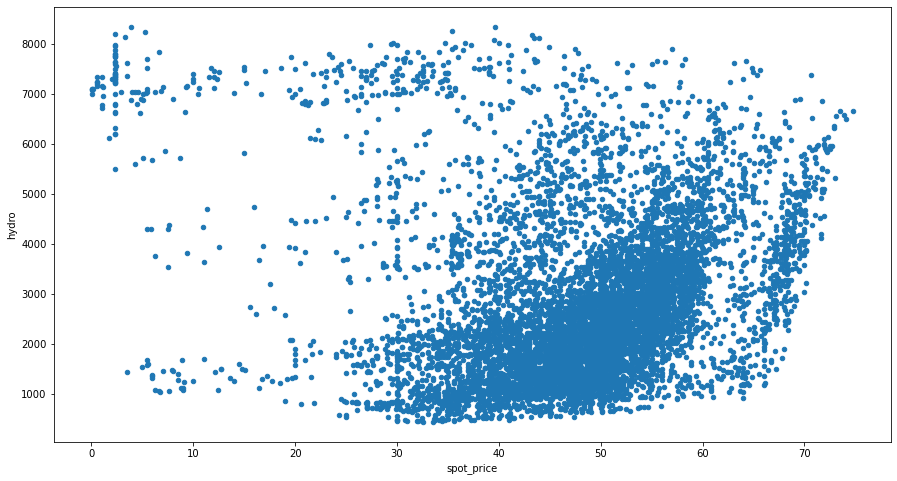

In [19]:
# Part 1
# What´s the effect of hydroelectric power generation on the price of electricity?

energy.plot(x="spot_price", y="hydro", kind="scatter", figsize=(15, 8))

# Trend: As hydro generation increases, the price steadily increases ranging from 25~ to 70~. intensity

<AxesSubplot:xlabel='spot_price', ylabel='wind'>

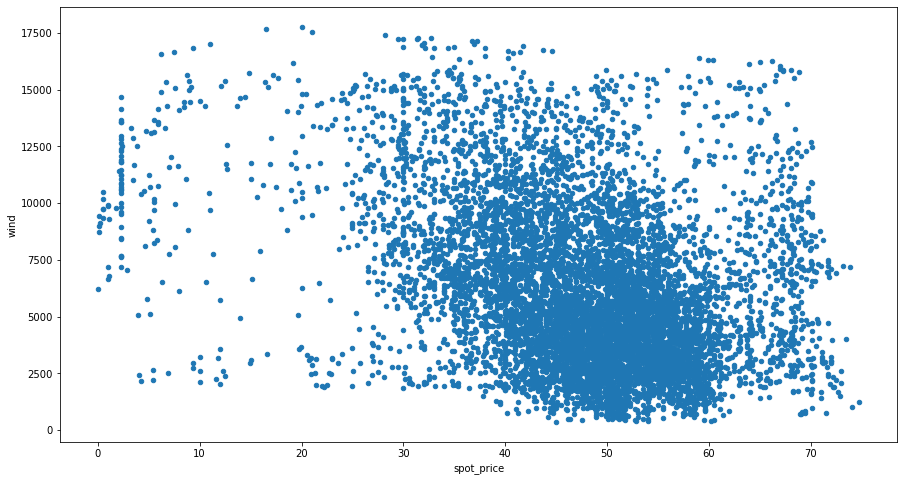

In [20]:
# Part 2
# What´s the effect of wind power generation on the price of electricity?

energy.plot(x="spot_price", y="wind", kind="scatter", figsize=(15, 8))

# Trend: As wind generation decreases, the prices decrease, staying within the range 25~ and 70~. Having some outliers at several generation levels,
# with prices ranging from 0 to 25~.

<AxesSubplot:xlabel='spot_price', ylabel='solar'>

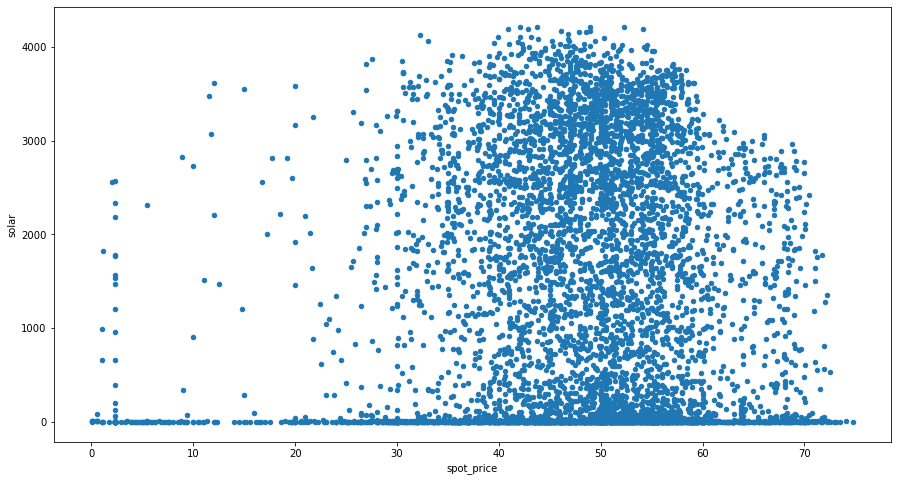

In [21]:
# Part 3
# What´s the effect of solar power generation on the price of electricity?

energy.plot(x="spot_price", y="solar", kind="scatter", figsize=(15, 8))

# Trend: As we increase solar power generation, the prices tend to range between 30~ and 70~.

<AxesSubplot:xlabel='spot_price', ylabel='nuclear'>

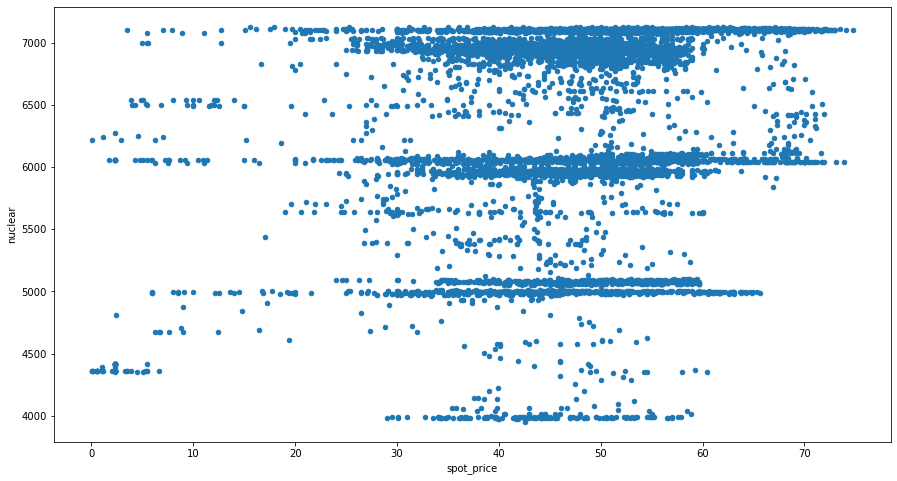

In [22]:
# Part 4
# What´s the effect of nuclear power generation on the price of electricity?

energy.plot(x="spot_price", y="nuclear", kind="scatter", figsize=(15, 8))
#energy.plot(x="spot_price", y="nuclear", kind="line", figsize=(10, 5))

# Trend: For different nuclear generation thresholds we get a range of prices. When we generate 7000 units of nuclear power
# price ranges between 20~ and 70~, for 6000 units it ranges between 25~ and 65~, for 5000 units it ranges from 30~ to 60~.  

<AxesSubplot:xlabel='spot_price', ylabel='gas'>

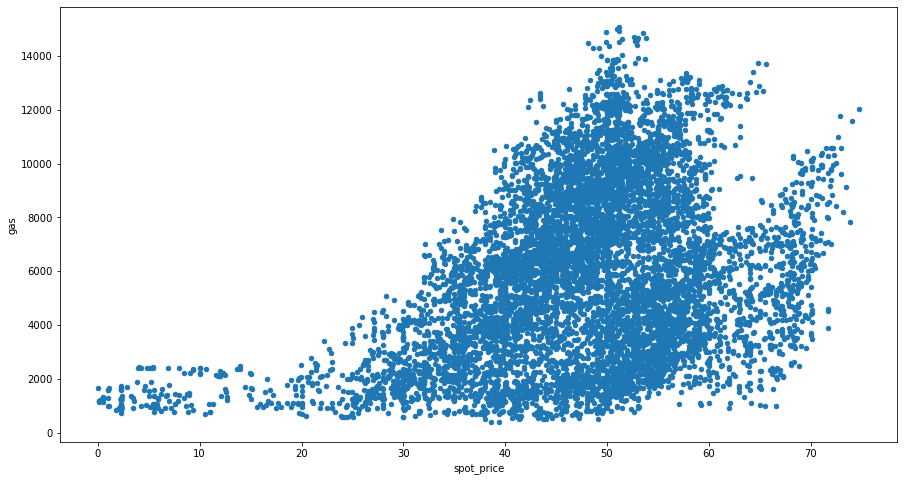

In [23]:
# Part 5
# What´s the effect of gas power generation on the price of electricity?

energy.plot(x="spot_price", y="gas", kind="scatter", figsize=(15, 8))

# Trend: When the gas generation is below 3000~, the prices range between 0 and 25~, as our generation increase prices steadily increase as well.

<AxesSubplot:xlabel='spot_price', ylabel='coal'>

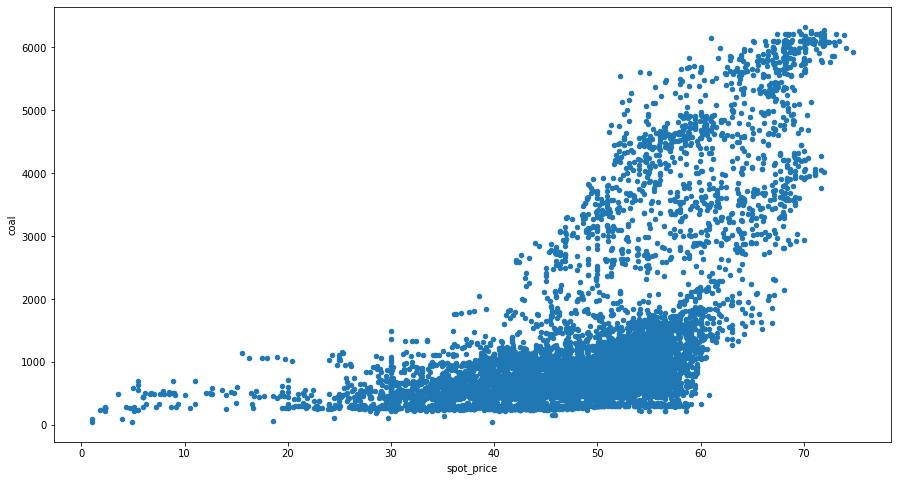

In [24]:
# Part 6
# What´s the effect of coal power generation on the price of electricity?

energy.plot(x="spot_price", y="coal", kind="scatter", figsize=(15, 8))

# Trend: Coal is the least desired energy producer by regulators and policy makers, 
# we can see in the scatter plot that coal generation is activated when prices are above 40,
# this could be a measuer to increase the supply and ease the  spot price.

,hydro,gas,wind,solar,nuclear,price,coal
0,Positive Correlation,Positive Correlation,Negative Correlation,Positive Correlation,Positive Correlation,Positive Correlation,Positive Correlation


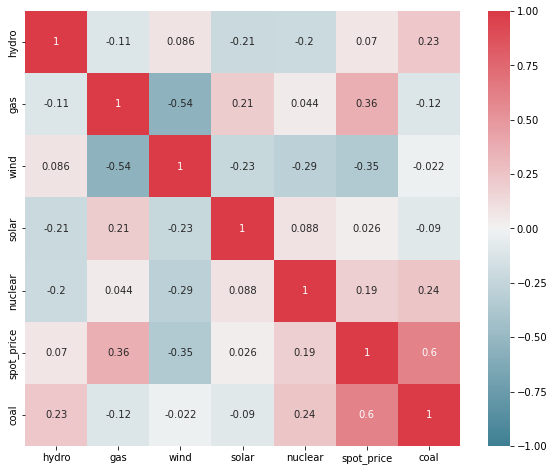

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
df_visualize = energy[["hydro","gas","wind","solar","nuclear","spot_price","coal"]]

f, ax = plt.subplots(figsize=(10, 8)) #this is a function that returns a tuple containing a figures and axes.


#the f and ax are the variables where we store the fiogure and the axes
corr = df_visualize.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax,
            annot=True)
correlations = df_visualize.corr()
correlations = np.where(correlations[["hydro","gas","wind","solar","nuclear","spot_price","coal"]] < 0, "Negative Correlation", "Positive Correlation")


corr1 = pd.DataFrame(correlations[5])
corr1=corr1.T
corr1.rename(columns={0:"hydro", 1:"gas", 2: "wind", 3:"solar", 4:"nuclear", 5:"price", 6:"coal"})